# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## FINAL PROJECT
## Starter code

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To get acquainted with representative datasets and problems in data science and machine learning
- To learn how to implement several different machine learning models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in 3 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 195 (plus up to 100 bonus points).

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [80]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss

-------------------
## Part 1: Decision trees

In this part, we will take another look at the Iris dataset.

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [81]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.1 Your turn! (25 points)

Write code to: 

1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset. (15 pts)
2. Compute relevant summary statistics for each species. (10 pts)

## Solution

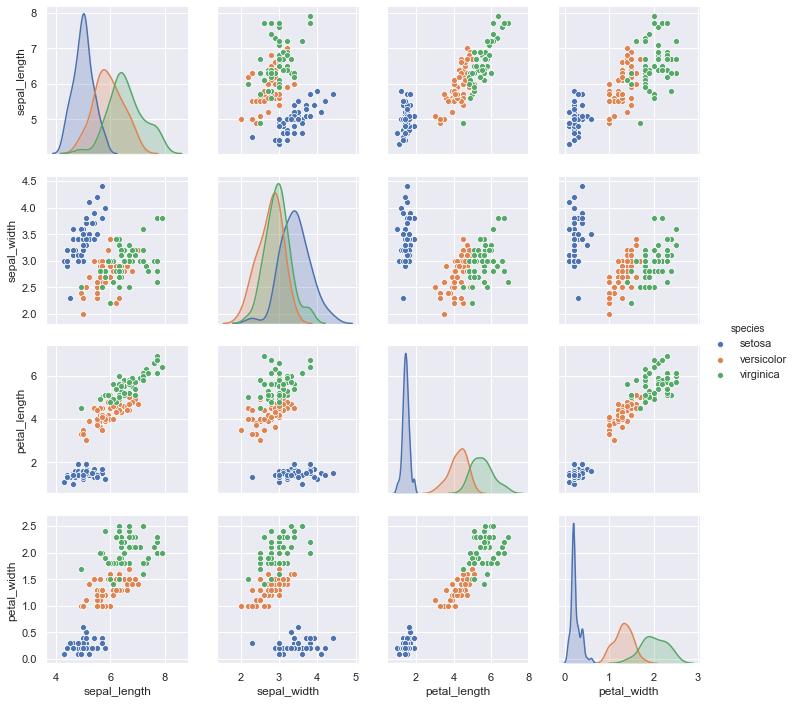

In [82]:
#Pair plots for all attributes for all categories (Species).
sns.pairplot(iris, hue='species', height=2.5);

In [83]:
#Summary statistics of Iris datbase
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [85]:
from pandas.api.types import is_numeric_dtype

for col in iris.columns:
    if is_numeric_dtype(iris[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % iris[col].mean())
        print('\t Standard deviation = %.2f' % iris[col].std())
        print('\t Minimum = %.2f' % iris[col].min())
        print('\t Maximum = %.2f' % iris[col].max())

sepal_length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal_width:
	 Mean = 3.06
	 Standard deviation = 0.44
	 Minimum = 2.00
	 Maximum = 4.40
petal_length:
	 Mean = 3.76
	 Standard deviation = 1.77
	 Minimum = 1.00
	 Maximum = 6.90
petal_width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


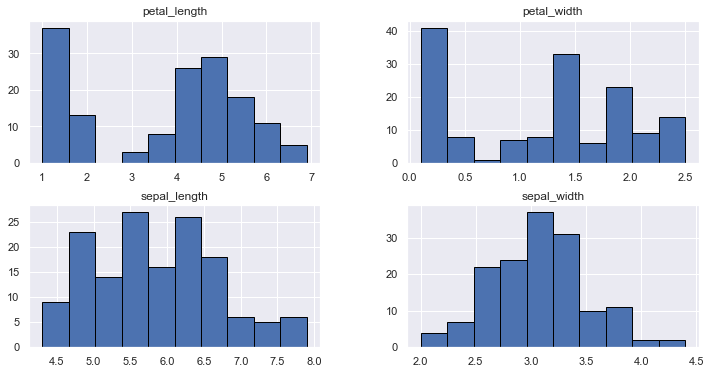

In [86]:
# Iris atributes hitogram
iris.hist(figsize=(12,6), ec='black');

## 1.2 Your turn! (35 points)

Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (10 pts)
2. Plot the resulting decision tree. It should look similar to the plot below. (15 pts)
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. (10 pts)

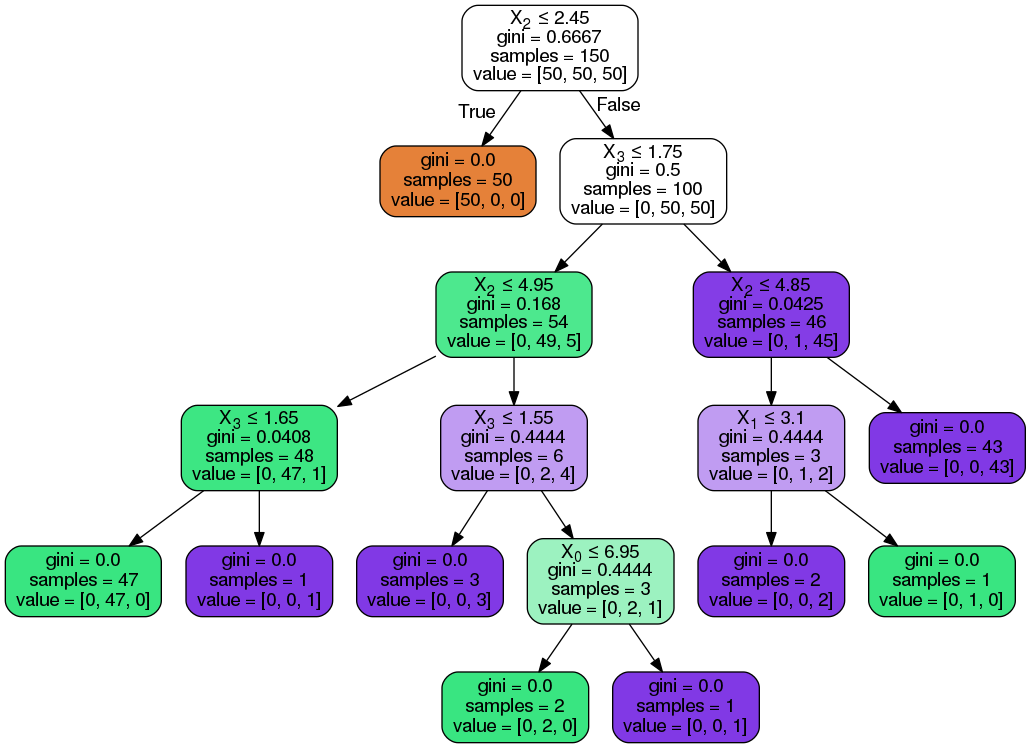

## Solution

In [87]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [88]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# load dataset
iris = sns.load_dataset("iris")

In [89]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [90]:
#split dataset in features and target variable
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols] # Features
y = iris.species # Target variable

In [91]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [92]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predict = clf.predict(X_test)

In [93]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9555555555555556


In [94]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
conda install graphviz

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


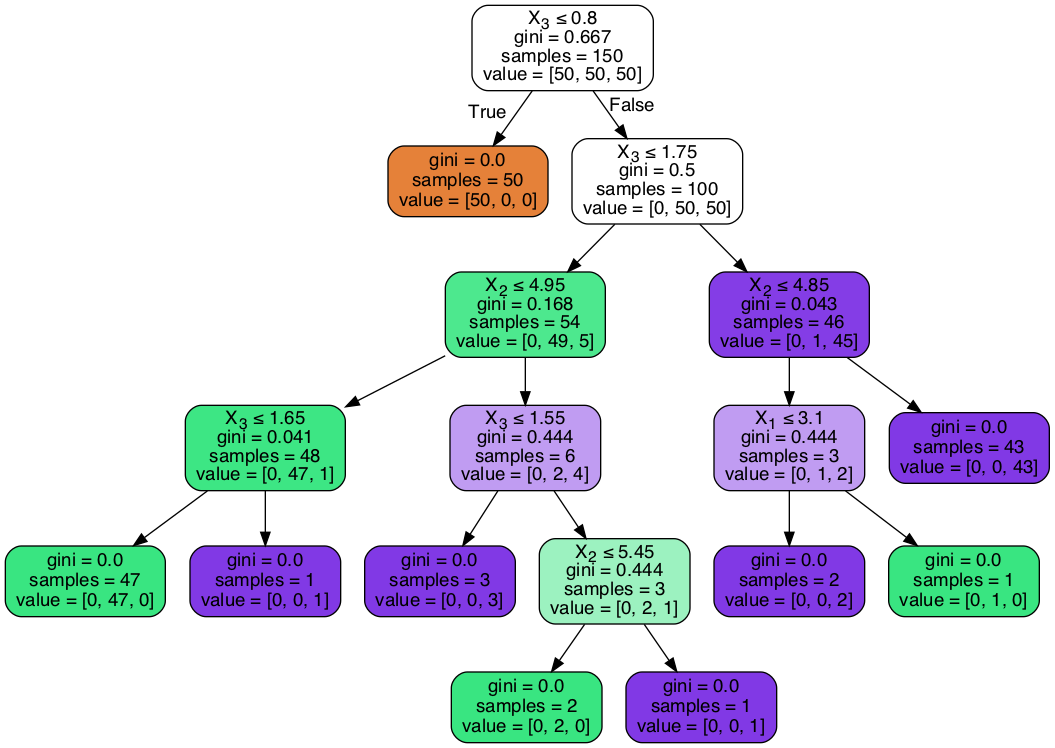

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Bonus opportunity 1 (15 points)

Make meaningful changes to the baseline code, e.g., trying different combinations of functions to measure the quality of a split, limiting the maximum depth of the tree, etc. 

Publish the code, the results, and comment on how they differ from the baseline (and your intuition as to *why* they do).

## Solution

In [15]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy',
                       max_depth=3, random_state=0)

tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

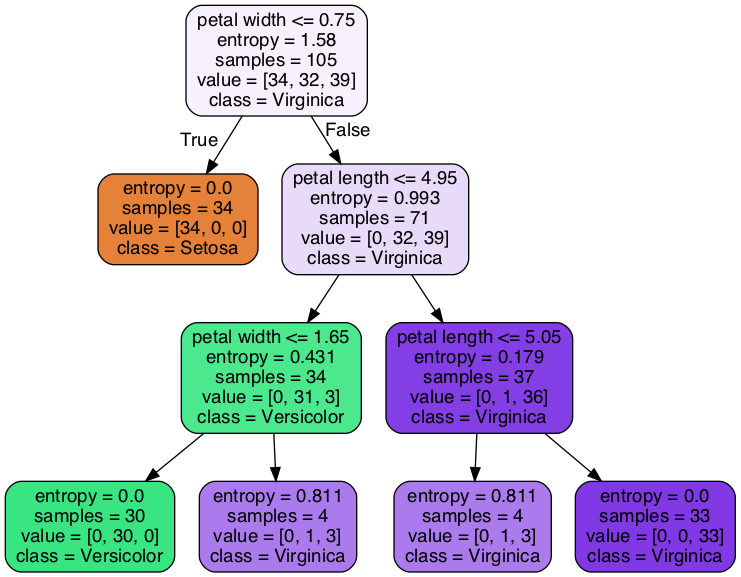

In [16]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree.png')   
Image(graph.create_png())

The diference from the base line code is that here (Bonus 1) I use entropy instead gini index as criterion. This criterion is known as the impurity measure (mentioned in the previous section). In classification, entropy is the most common impurity measure or splitting criteria. In addition, I set the max. depat to 3 and random state to 0.

# Part 2: Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28 ×× 28 pixels. They are saved in the csv data files mnist_train.csv and mnist_test.csv.

Every line of these files consists of a grayscale image and its label, i.e. 785 numbers between 0 and 255:

The first number of each line is the label, i.e. the digit which is depicted in the image.
The following 784 numbers are the pixels of the 28  ××  28 image.
The Python code below loads the images from CSV files, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [17]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

In [18]:
test_data.shape

(10000, 785)

In [19]:
train_imgs = np.asfarray(train_data[:, 1:])/255.0
test_imgs = np.asfarray(test_data[:, 1:])/255.0
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [20]:
train_labels.shape

(60000, 1)

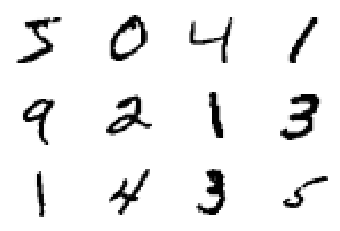

In [21]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_imgs[i].reshape((28,28)), cmap="Greys")
    axi.set(xticks=[], yticks=[])

## 2.1 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy will be around 83.5%

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

mnist = datasets.load_digits()


(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
                                                mnist.target, test_size=0.25, random_state=42)

clf = MultinomialNB()
clf.fit(trainData, trainLabels)
y_pred = clf.predict(testData)
y_true = testLabels.ravel()

print('1-\nClassification Report:\n', classification_report(y_true, y_pred))
print('2-\nMultinomailNB accuracy: ', clf.score(testData, testLabels))



1-
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.90      0.73      0.81        37
           2       0.85      0.92      0.89        38
           3       1.00      0.89      0.94        46
           4       0.95      1.00      0.97        55
           5       0.96      0.86      0.91        59
           6       0.98      0.96      0.97        45
           7       0.93      1.00      0.96        41
           8       0.78      0.95      0.86        38
           9       0.80      0.85      0.83        48

    accuracy                           0.92       450
   macro avg       0.92      0.91      0.91       450
weighted avg       0.92      0.92      0.92       450

2-
MultinomailNB accuracy:  0.9155555555555556


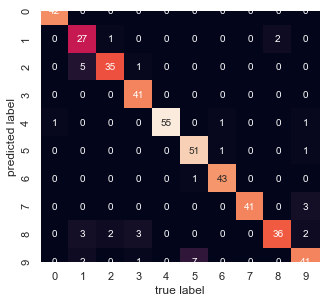

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Solution

## 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy should be > 90%

## Solution

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


mnist = datasets.load_digits()



(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
                                                mnist.target, test_size=0.25, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(trainData, trainLabels)

y_pred = clf.predict(testData)
y_true = testLabels.ravel()


print('\n 1- Classification Report:\n', classification_report(y_true, y_pred))
print('\n2-MultinomailNB accuracy: ', clf.score(testData, testLabels))




 1- Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       0.98      1.00      0.99        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        41
           8       0.97      0.95      0.96        38
           9       1.00      0.96      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


2-MultinomailNB accuracy:  0.98


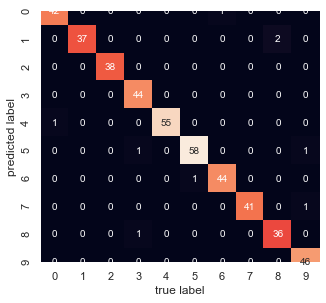

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 2.3 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

## Solution

In [26]:
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


mndata = datasets.load_digits()

(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mndata.data),
                                                mndata.target, test_size=0.25, random_state=42)

clf_dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
clf_dt.fit(trainData, trainLabels)

pred = clf_dt.predict(testData)


print('\n 1- Classification Report:\n', classification_report(y_true, y_pred))
print('\n2- Decision Tree Classifier accuracy: ', clf.score(testData, testLabels))




 1- Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       0.98      1.00      0.99        55
           5       0.97      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      1.00      0.99        41
           8       0.97      0.95      0.96        38
           9       1.00      0.96      0.98        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450


2- Decision Tree Classifier accuracy:  0.98


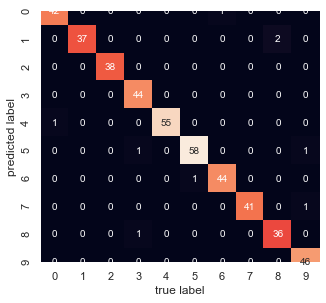

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

-------------------
## Part 3: Face Recognition 

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

Hint: you will have to install Pillow for this part. See https://pillow.readthedocs.io/en/stable/

In [28]:
conda install Pillow

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


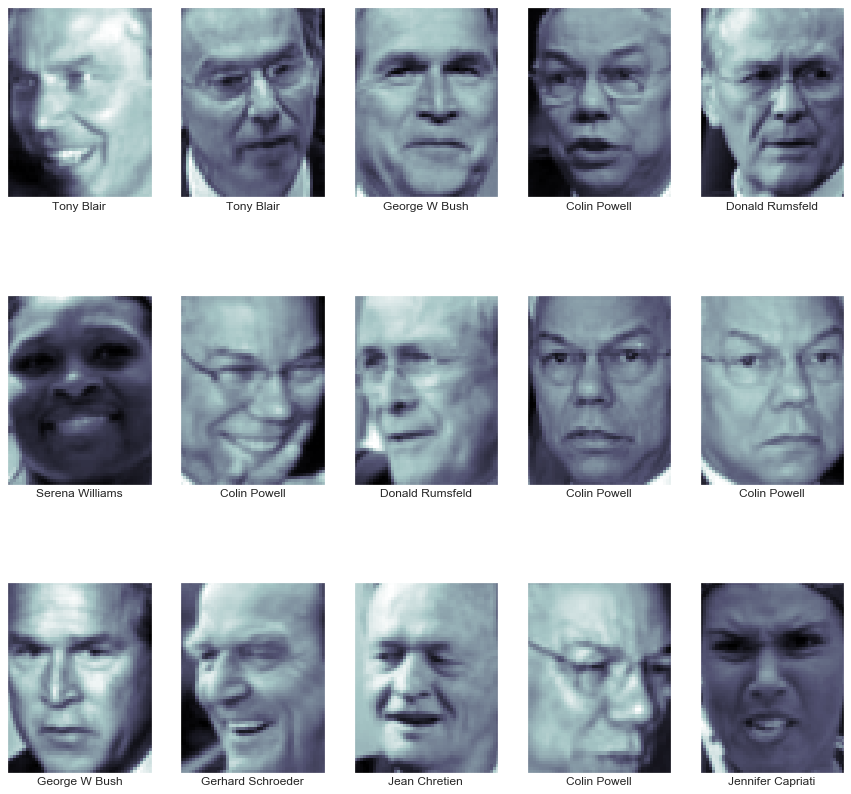

In [30]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 3.1 Your turn! (55 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. (10 pts)
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. (10 pts)
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. (25 pts)
4. Display examples of correct and incorrect predictions (at least 5 of each). (10 pts)

## Solution

In [31]:
#1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components.

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


In [32]:
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [33]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [34]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 120

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 120 eigenfaces from 966 faces
done in 0.340s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.020s


In [35]:
#2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced features.

# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set
done in 40.745s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [38]:
#3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix.

# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print('\n 1- Classification Report:\n', classification_report(y_test, y_pred))


Predicting people's names on the test set
done in 0.076s
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.62      0.64        13
     Colin Powell       0.84      0.87      0.85        60
  Donald Rumsfeld       0.90      0.67      0.77        27
    George W Bush       0.87      0.97      0.92       146
Gerhard Schroeder       0.91      0.84      0.87        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.91      0.81      0.85        36

         accuracy                           0.87       322
        macro avg       0.86      0.77      0.80       322
     weighted avg       0.87      0.87      0.86       322


 1- Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.84      0.87      0.85        60
           2       0.90      0.67      0.77        27
           3       0.87      0.97      0.92  

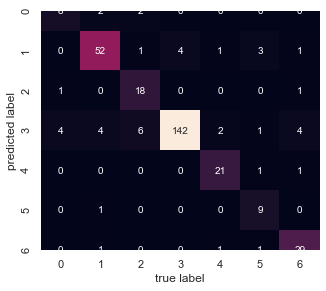

In [39]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [40]:
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

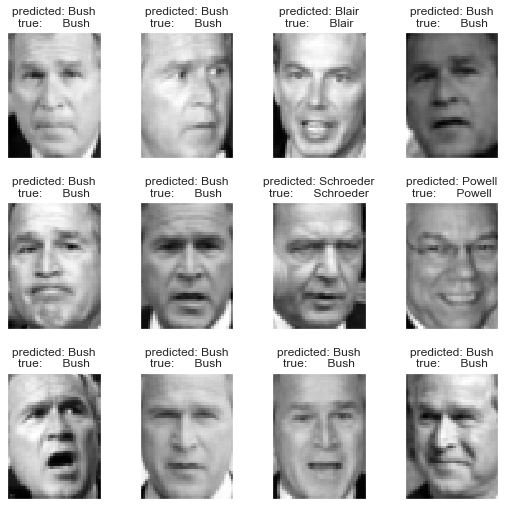

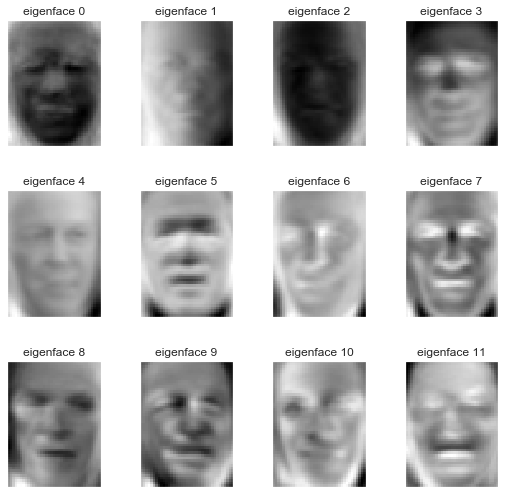

In [41]:
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]


plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()



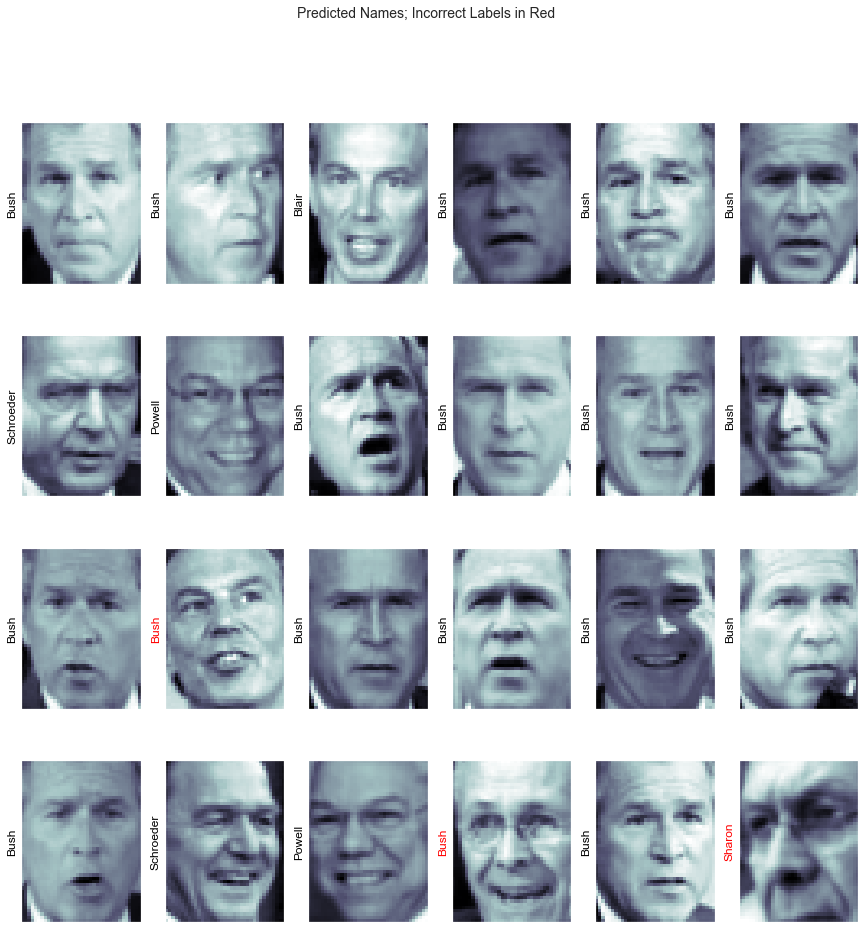

In [42]:
# 4. Display examples of correct and incorrect predictions (at least 5 of each)

y_pred = clf.predict(X_test_pca)
faces = lfw_people

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(h, w), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

## Bonus opportunity 2 (35 points)

Make meaningful changes to the baseline code, e.g.:

- trying different combinations of SVM parameters following a grid search cross-validation approach.
- experimenting with different values of number of components for the PCA and showing how much of the variance they explain (i.e., plotting the cumulative explained variance as a function of the number of components).
- using "data augmentation" to generate additional training images (for under-represented classes).

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [43]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

Automatically created module for IPython interactive environment


In [44]:
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [45]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [46]:
n_components = 120

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


Extracting the top 120 eigenfaces from 966 faces
done in 0.192s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.016s


In [47]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 1], }
clf = GridSearchCV(SVC(kernel='poly', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 47.401s
Best estimator found by grid search:
SVC(C=0.01, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [76]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print('\n 1- Classification Report:\n', classification_report(y_test, y_pred))


Predicting people's names on the test set
done in 0.077s
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.08      0.14        13
     Colin Powell       0.96      0.38      0.55        60
  Donald Rumsfeld       0.80      0.15      0.25        27
    George W Bush       0.51      0.99      0.67       146
Gerhard Schroeder       1.00      0.08      0.15        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       1.00      0.17      0.29        36

         accuracy                           0.56       322
        macro avg       0.75      0.26      0.29       322
     weighted avg       0.71      0.56      0.48       322


 1- Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.96      0.38      0.55        60
           2       0.80      0.15      0.25        27
           3       0.51      0.99      0.67  

/Users/yairel/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


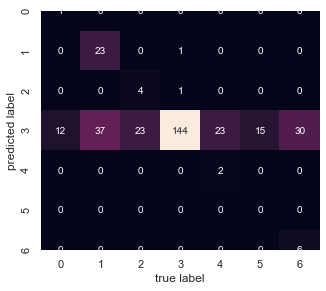

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

I tried different combinations of the SVM paramaeters on the baseline code, for example, I change the values of the param_grid ( in "C" and "gamma"values) as well as on the GridSearchSV I used the kernel "poly" instead of "rbf". The obtained result was lower that the original code.

## Bonus opportunity 3 (50 points)

Write code to incorporate face detection capabilities (see "Face Detection Pipeline" in the textbook), improve it to include non-maximal suppression (to produce 'clean' detection results) and demonstrate how it can be used to:
- load an image that the model has never seen before (e.g. an image you downloaded from the Internet)
- locate (i.e. detect) the face in the image
- resize the face region to 62 $\times$ 47 pixels
- run the face recognition code you wrote above and produce a message showing the closest 'celebrity' from the dataset.

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

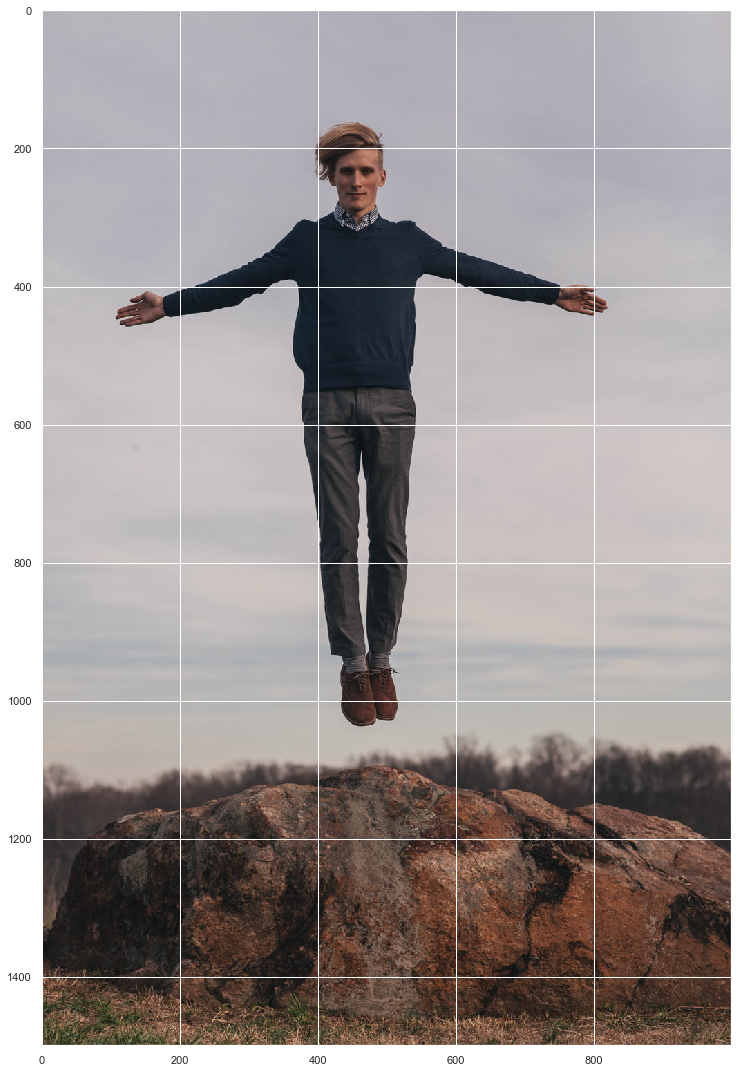

In [62]:
# my own image using skikit-image
import os 
  
# importing io from skimage 
import skimage 
from skimage import io 
#bride.jpeg was added to the skimage data_dir 
# way to load bride image from file 
file = os.path.join(skimage.data_dir, 'human.png')   
img = io.imread(file) 
  
# show the bride.jpeg image 
io.imshow(img) 
io.show() 

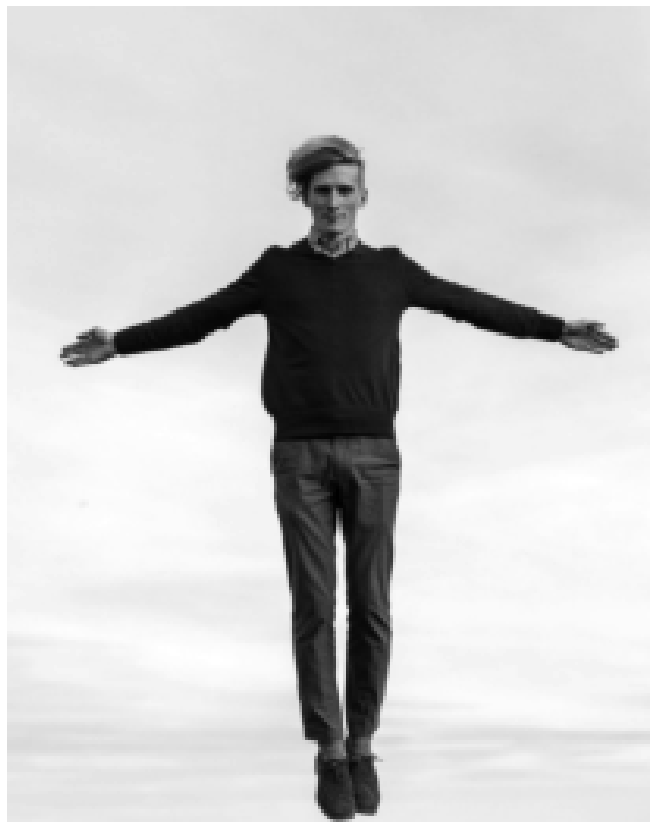

In [75]:
from skimage import data, color, feature
import skimage.data
import skimage.io as io
from skimage import data_dir

img = io.imread('human.png')


img = skimage.color.rgb2gray(img)
img = skimage.transform.rescale(img, 0.25)
img = img[:260, 10:215]

plt.imshow(img, cmap='gray')
plt.axis('off');

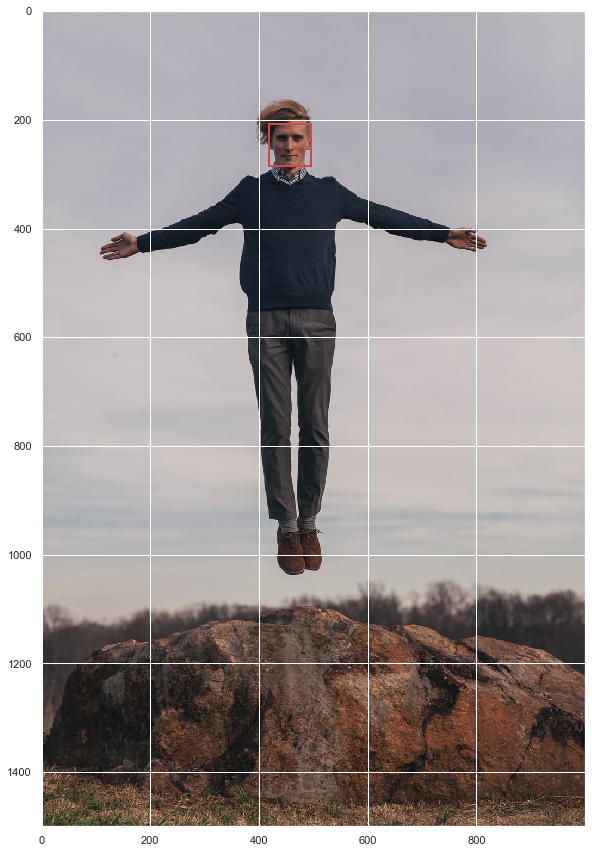

In [61]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)
from skimage import io
import skimage.io as io
from skimage import data_dir

#from skimage import data
#camera = data.camera()
#img = data.studio()
#img= io.ImageCollection(data_dir + '/studio.png')
img = io.imread('human.png')



detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()


## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. I have learned how to make a good statistics summary, how to implement Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy),how to implement several different machine learning models in Python, how to evaluate and fine-tune the performance of a model using cross-validation and how to test a model and produce a set of plots and performance measures. Also, I have learn how to plot confusion matrix in a heatmap and how to plot the correct and incorrect prediction of face recognition dataset.


2. The part that I enjoyed most was the part three with Labeled Faces in the Wild (LFW) people dataset. However, the most time consuming was the plot with examples of correct and incorrect predictions. The most enlightening how computers are able to recognize faces.The most tedious part was build and fit a 10-class Random Forests classifier.


3. If I would have more time I will work more in the bonus points.